In [1]:
import os
import datetime

import IPython
import IPython.display
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf

mpl.rcParams['figure.figsize'] = (8, 6)
mpl.rcParams['axes.grid'] = False

In [2]:
df_begin=pd.read_csv('D:\\KULIAH\\teep\AI\\dataset\\52 cells\\CellReports.csv')
df_begin

,timestamp,Viavi.Cell.Name,DRB.UEThpDl,DRB.UEThpUl,RRU.PrbUsedDl,RRU.PrbUsedUl,RRU.PrbAvailDl,RRU.PrbAvailUl,RRU.PrbTotUl,RRU.PrbTotDl,RRU.MaxLayerDlMimo,CARR.AverageLayersDl,RRC.ConnMean,RRC.ConnMax,QosFlow.TotPdcpPduVolumeUl,QosFlow.TotPdcpPduVolumeDl,PEE.AvgPower,PEE.Energy
0,1672502400,S1/B2/C1,0.278192,0.278192,81.459016,81.459016,100,100,81.459016,81.459016,0.0,0.0,1.786885,2.311475,277.868853,277.868853,281.947679,0.004195
1,1672502400,S7/B2/C1,0.146310,0.146310,50.000000,50.000000,100,100,50.000000,50.000000,0.0,0.0,0.516667,1.316667,146.050000,146.050000,180.817352,0.002292
2,1672502400,S8/B2/C1,0.220303,0.220303,64.300000,64.300000,100,100,64.300000,64.300000,0.0,0.0,1.450000,3.966667,220.083333,220.083333,230.893458,0.004631
3,1672502400,S9/B2/C1,0.186428,0.186428,80.900000,80.900000,100,100,80.900000,80.900000,0.0,0.0,1.916667,6.900000,186.083333,186.083333,279.584476,0.005326
4,1672502400,S1/B13/C1,0.000000,0.000000,0.000000,0.000000,75,75,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,18.250000,0.000360
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
524206,1673107140,S3/N77/C2,0.000000,0.000000,0.000000,0.000000,273,273,0.000000,0.000000,0.0,0.0,0.000000,4.000000,0.000000,0.000000,21.000000,11.000064
524207,1673107140,S3/N77/C3,0.000000,0.000000,0.000000,0.000000,273,273,0.000000,0.000000,0.0,0.0,0.000000,2.000000,0.000000,0.000000,21.000000,7.609575
524208,1673107140,S4/N77/C1,0.000000,0.000000,0.000000,0.000000,273,273,0.000000,0.000000,0.0,0.0,0.000000,3.000000,0.000000,0.000000,21.000000,7.789410
524209,1673107140,S4/N77/C2,0.000000,0.000000,0.000000,0.000000,273,273,0.000000,0.000000,0.0,0.0,0.000000,5.000000,0.000000,0.000000,21.000000,18.617635


In [3]:
df_1=df_begin[['timestamp', 'RRU.MaxLayerDlMimo','PEE.AvgPower', 'RRU.PrbUsedDl', 'RRU.PrbUsedUl']].copy()
convert_time=pd.to_datetime(df_1['timestamp'], unit='s',origin='unix')
df_1.insert(df_1.columns.get_loc('timestamp') + 1, 'datetime_column', convert_time)
df_1.set_index('datetime_column', inplace=True)
df_1.drop(columns=['timestamp'], inplace=True)

In [4]:
try:
    df_2= df_1.resample('T').mean().drop(columns=['Viavi.Cell.Name'])
except:
    df_2= df_1.resample('T').mean()
df=df_2.astype(float).copy()
df

,RRU.MaxLayerDlMimo,PEE.AvgPower,RRU.PrbUsedDl,RRU.PrbUsedUl
datetime_column,,,,
2022-12-31 16:00:00,0.029167,163.482931,41.647609,40.984468
2022-12-31 16:01:00,0.042949,153.417886,42.121474,41.068910
2022-12-31 16:02:00,0.035256,158.808699,41.851282,40.958333
2022-12-31 16:03:00,0.041026,157.386986,42.577885,41.491026
2022-12-31 16:04:00,0.032051,167.089184,43.626603,42.665705
...,...,...,...,...
2023-01-07 15:55:00,0.028205,164.456731,42.102244,41.227244
2023-01-07 15:56:00,0.026603,159.064446,40.426282,39.726282
2023-01-07 15:57:00,0.023077,161.020629,40.190705,40.190705


In [5]:
column_indices = {name: i for i, name in enumerate(df.columns)}

n = len(df)
train_df =df[0:int(n*0.9048)]
val_df = df[int(n*0.9048):]
test_df = df[int(n*0.9048):]

num_features = df.shape[1]

In [6]:
train_mean = train_df.mean()
train_std = train_df.std()

train_df = (train_df - train_mean) / train_std
val_df = (val_df - train_mean) / train_std
test_df = (test_df - train_mean) / train_std

In [7]:
train_df

,RRU.MaxLayerDlMimo,PEE.AvgPower,RRU.PrbUsedDl,RRU.PrbUsedUl
datetime_column,,,,
2022-12-31 16:00:00,-0.508276,-0.149705,-0.558628,-0.378301
2022-12-31 16:01:00,0.809649,-1.655990,-0.394999,-0.347874
2022-12-31 16:02:00,0.074063,-0.849227,-0.488298,-0.387718
2022-12-31 16:03:00,0.625752,-1.061994,-0.237399,-0.195776
2022-12-31 16:04:00,-0.232432,0.389990,0.124729,0.227490
...,...,...,...,...
2023-01-06 23:55:00,-1.090615,-2.359902,-2.296392,-2.265909
2023-01-06 23:56:00,-0.998667,-0.969934,-1.474743,-1.553113
2023-01-06 23:57:00,1.177442,-1.266114,0.286314,-0.178106


In [8]:
# Parameter windowing
input_width = 60*2
label_width = 60
shift = label_width
total_window_size = input_width + shift
OUT_STEPS = label_width
# Definisikan irisan untuk input dan label
input_slice = slice(0, input_width)
label_start = total_window_size - label_width
labels_slice = slice(label_start, None)

def make_windows(data, total_window_size, input_slice, labels_slice):
    x = []
    y = []
    for i in range(len(data) - total_window_size + 1):
        window = data[i:i+total_window_size]
        x.append(window[input_slice])
        y.append(window[labels_slice])
    return np.array(x), np.array(y)

# Membuat windowed dataset untuk set pelatihan, validasi, dan pengujian
x_train, y_train = make_windows(train_df.to_numpy(), total_window_size, input_slice, labels_slice)
x_val, y_val = make_windows(val_df.to_numpy(), total_window_size, input_slice, labels_slice)
x_test, y_test = make_windows(test_df.to_numpy(), total_window_size, input_slice, labels_slice)

# Verifikasi bentuk windowed dataset
print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)
print("x_val shape:", x_val.shape)
print("y_val shape:", y_val.shape)
print("x_test shape:", x_test.shape)
print("y_test shape:", y_test.shape)


x_train shape: (8941, 120, 4)
y_train shape: (8941, 60, 4)
x_val shape: (781, 120, 4)
y_val shape: (781, 60, 4)
x_test shape: (781, 120, 4)
y_test shape: (781, 60, 4)


In [9]:
MAX_EPOCHS = 10

def compile_and_fit(model, window, patience=2):
  early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=patience,
                                                    mode='min')

  model.compile(loss=tf.keras.losses.MeanSquaredError(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=[tf.keras.metrics.MeanAbsoluteError()])

  model.fit(window[0],window[1], epochs=MAX_EPOCHS,
                      callbacks=[early_stopping])
  return model

multi_lstm_model = tf.keras.Sequential([
    # Shape [batch, time, features] => [batch, lstm_units].
    # Adding more `lstm_units` just overfits more quickly.
    tf.keras.layers.LSTM(64, return_sequences=True, input_shape=(input_width, num_features)),
    tf.keras.layers.LSTM(64, return_sequences=True),
    tf.keras.layers.LSTM(32, return_sequences=False),
    # Shape => [batch, out_steps*features].
    tf.keras.layers.Dense(OUT_STEPS*num_features,
                          kernel_initializer=tf.initializers.zeros()),
    # Shape => [batch, out_steps, features].
    tf.keras.layers.Reshape([OUT_STEPS, num_features])
])

train_scaled_final=(x_train, y_train)
history = compile_and_fit(multi_lstm_model, train_scaled_final)


Epoch 1/10
280/280 [==============================] - 11s 23ms/step - loss: 0.9887 - mean_absolute_error: 0.7913
Epoch 2/10
280/280 [==============================] - 6s 22ms/step - loss: 0.9742 - mean_absolute_error: 0.7855
Epoch 3/10
280/280 [==============================] - 7s 24ms/step - loss: 0.9660 - mean_absolute_error: 0.7823
Epoch 4/10
280/280 [==============================] - 7s 26ms/step - loss: 0.9546 - mean_absolute_error: 0.7778
Epoch 5/10
280/280 [==============================] - 7s 24ms/step - loss: 0.9397 - mean_absolute_error: 0.7717
Epoch 6/10
280/280 [==============================] - 7s 25ms/step - loss: 0.9219 - mean_absolute_error: 0.7645
Epoch 7/10
280/280 [==============================] - 6s 21ms/step - loss: 0.9070 - mean_absolute_error: 0.7582
Epoch 8/10
280/280 [==============================] - 6s 22ms/step - loss: 0.8931 - mean_absolute_error: 0.7521
Epoch 9/10
280/280 [==============================] - 6s 20ms/step - loss: 0.8788 - mean_absolute_error

In [10]:
import datetime

# Get the current date and time
now = datetime.datetime.now()

# Format the date and time to a string
timestamp = now.strftime("%Y%m%d_%H%M")
print(timestamp)
nama_file='7c_%s.hdf5'%timestamp
history.save(filepath=nama_file)

20240718_1807


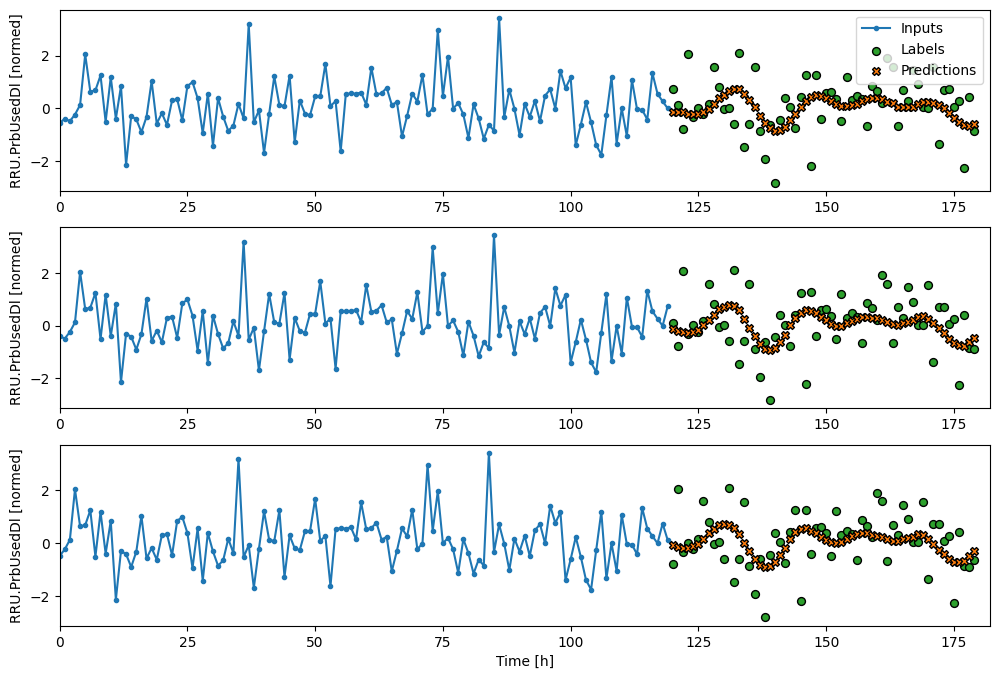

In [15]:
import matplotlib.pyplot as plt
import numpy as np

import matplotlib.pyplot as plt
import numpy as np

def plot(inputs, labels, model=None, plot_col='T (degC)', max_subplots=3,
         input_indices=None, label_indices=None, column_indices=None, label_columns=None, label_columns_indices=None):
    
    # Set up the figure size for plotting
    plt.figure(figsize=(12, 8))
    # Find the index of the column to plot
    plot_col_index = column_indices[plot_col]
    # Determine the number of subplots to create, limited by max_subplots
    max_n = min(max_subplots, len(inputs))
    for n in range(max_n):
        # Create a subplot for each input example up to max_n
        plt.subplot(max_n, 1, n+1)
        # Set the label for the y-axis
        plt.ylabel(f'{plot_col} [normed]')
        # Plot the input data for the selected column
        plt.plot(input_indices, inputs[n, :, plot_col_index],
                 label='Inputs', marker='.', zorder=-10)

        # Check if label_columns is specified, to find the corresponding label column index
        if label_columns:
            label_col_index = label_columns_indices.get(plot_col, None)
           # print("label_columns_indices", label_columns_indices)
            #print(label_col_index)
            #print("asdfasdf")
        else:
            # If not specified, use the same index as the input column
            label_col_index = plot_col_index

        # Skip plotting labels if the column index is not found
        if label_col_index is None:
            continue
        # Plot the labels data as scatter plot
        #print("plot_col_index: ", plot_col_index)
        #print("n: ", n)
        if labels is not None:
            plt.scatter(label_indices, labels[n, :, label_col_index],
                        edgecolors='k', label='Labels', c='#2ca02c', s=32)
        # If a model is provided, use it to make predictions and plot them
        if model is not None:
            predictions = model(inputs)
            plt.scatter(label_indices, predictions[n, :, label_col_index],
                        marker='X', edgecolors='k', label='Predictions',
                        c='#ff7f0e', s=32)

        # Add a legend to the first subplot only for clarity
        if n == 0:
            plt.legend()
        plt.xlim(0,max(label_indices)+3)

    # Set the label for the x-axis
    plt.xlabel('Time [h]')
    plt.show()

# Contoh penggunaan fungsi plot
input_indices = np.arange(total_window_size)[input_slice]
label_indices = np.arange(total_window_size)[labels_slice]
label_columns = df.columns.to_list()
if label_columns is not None:
    # Create a dictionary mapping label names to their indices in the dataframe
    label_columns_indices = {name: i for i, name in
                                enumerate(label_columns)}
# Create a dictionary mapping all column names to their indices in the dataframe
column_indices = {name: i for i, name in
                        enumerate(train_df.columns)}
plot(inputs=x_train[:,:,:], labels=y_train, model=multi_lstm_model, plot_col='RRU.PrbUsedDl', 
     max_subplots=3, input_indices=input_indices, label_indices=label_indices, 
     column_indices=column_indices, label_columns=label_columns, label_columns_indices=label_columns_indices)


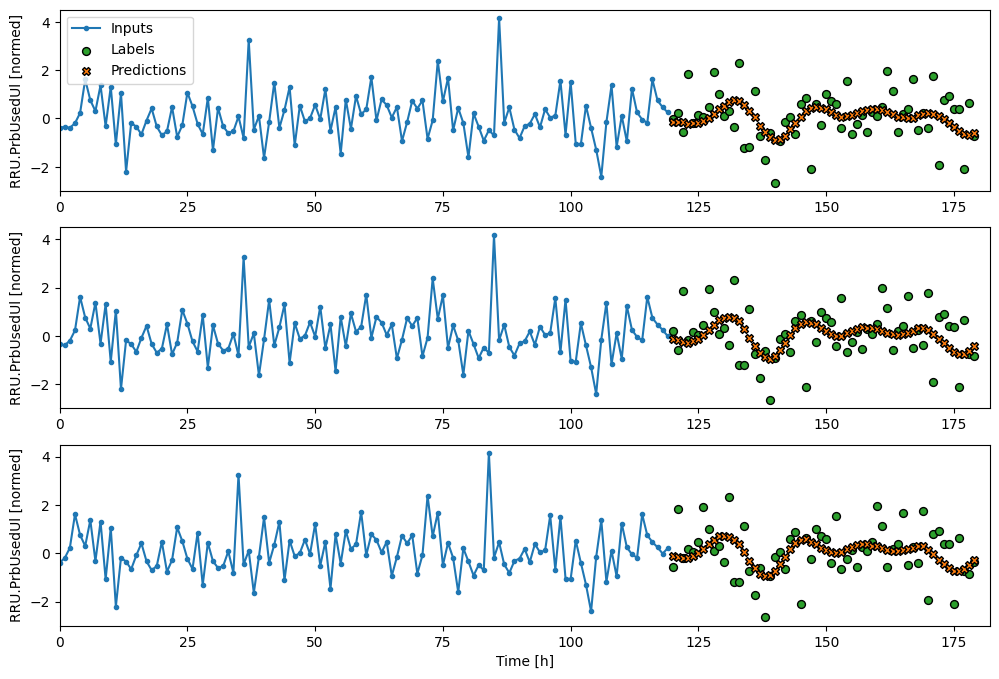

In [16]:
plot(inputs=x_train[:,:,:], labels=y_train, model=multi_lstm_model, plot_col='RRU.PrbUsedUl', 
     max_subplots=3, input_indices=input_indices, label_indices=label_indices, 
     column_indices=column_indices, label_columns=label_columns, label_columns_indices=label_columns_indices)
